In [1]:
import numpy as np
import h5py
import cv2 
import os, sys
import matplotlib.pyplot as plt

In [7]:
!ls ./

 0-Experiment.ipynb    3-automation.ipynb    'etc2-correlataion test.ipynb'
 1-watershed.ipynb     core
 2-find_center.ipynb  'etc1-FFT test.ipynb'


In [8]:
!ls ../result_data/221005_testdata_FBI_Net_Grayscale_Samsung_SET1_MSE_Affine_layers_x17_filters_x64.npy

../result_data/221005_testdata_FBI_Net_Grayscale_Samsung_SET1_MSE_Affine_layers_x17_filters_x64.npy


In [9]:
r_data = np.load("../result_data/221005_testdata_FBI_Net_Grayscale_Samsung_SET1_MSE_Affine_layers_x17_filters_x64.npy",mmap_mode='r')
r_data.shape

(1500, 256, 256)

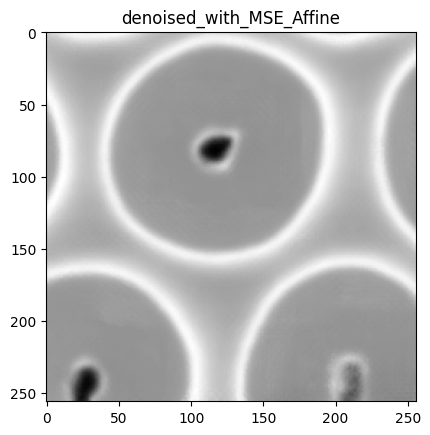

In [19]:
#plt.axis('off')
plt.title('denoised_with_MSE_Affine')
plt.imshow(r_data[0],cmap='gray')

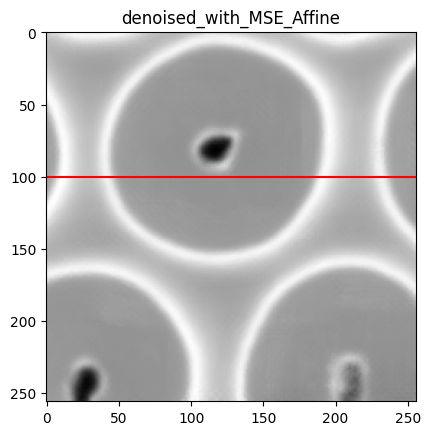

In [174]:
y = [100]*256
x = range(256)
plt.title('denoised_with_MSE_Affine')
plt.plot(x,y,color='r')
plt.imshow(r_data[0],cmap='gray')

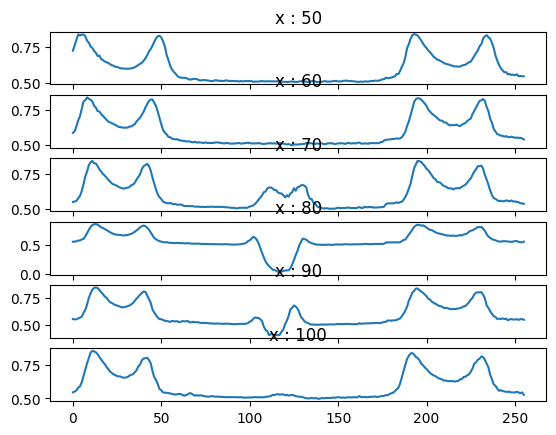

In [21]:
iter = range(50,101,10)
n = len(iter)
for i,x in enumerate(iter):
    plt.subplot(n,1,i+1)
    plt.title(f'x : {x}')
    plt.plot(r_data[0][x])

In [172]:
r_data[0][100][180:190]*1000

array([538.0109 , 542.66034, 552.75256, 567.1239 , 578.0519 , 609.73865,
       657.3877 , 707.3874 , 750.3326 , 794.89386], dtype=float32)

In [18]:
img = r_data[0]
ret, thresh = cv2.adaptiveThreshold(img,0.5,1,cv2.ADAPTIVE_THRESH_MEAN_C,24,2)
plt.axis('off')
plt.title('denoised_with_MSE_Affine & watershed')
plt.imshow(ret,cmap='gray')

error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/thresh.cpp:1674: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'adaptiveThreshold'


In [13]:
img.min(), img.max()

(0.029782604, 0.85591257)

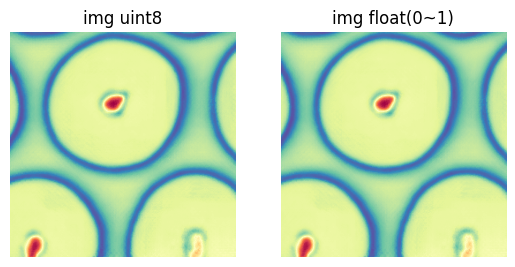

In [42]:
img_uint8 = (r_data[0]*255).astype('uint8')
plt.subplot(1,2,1)
plt.axis('off')
plt.title('img uint8')
plt.imshow(img_uint8,cmap='Spectral')
plt.subplot(1,2,2)
plt.axis('off')
plt.title('img float(0~1)')
plt.imshow(img,cmap='Spectral')

In [32]:
img_uint8[100][180:190]

array([137, 138, 140, 144, 147, 155, 167, 180, 191, 202], dtype=uint8)

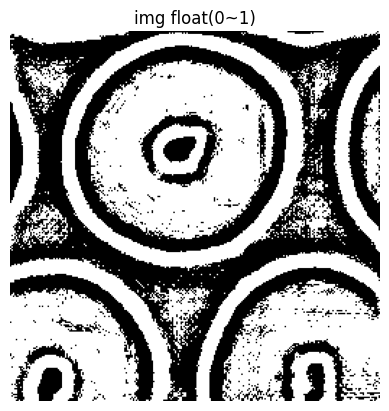

In [43]:
th1 = cv2.adaptiveThreshold(img_uint8,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2)

plt.axis('off')
plt.title('img float(0~1)')
plt.imshow(th1,cmap='gray')

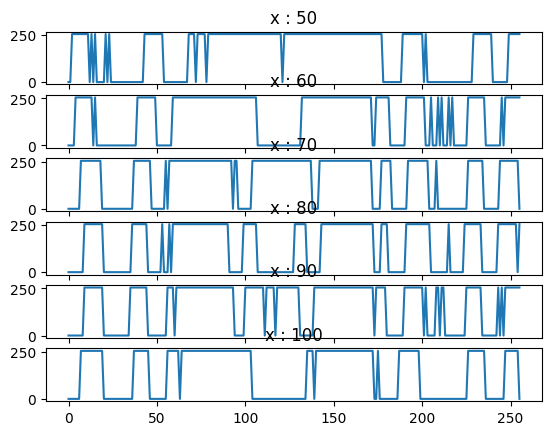

In [44]:
iter = range(50,101,10)
n = len(iter)
for i,x in enumerate(iter):
    plt.subplot(n,1,i+1)
    plt.title(f'x : {x}')
    plt.plot(th1[x])

In [38]:
th1[100][180:190]

array([  0,   0,   0,   0,   0,   0,   0, 255, 255, 255], dtype=uint8)

In [ ]:
cv2.THRESH

In [121]:
ret, th2 = cv2.threshold(img_uint8, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

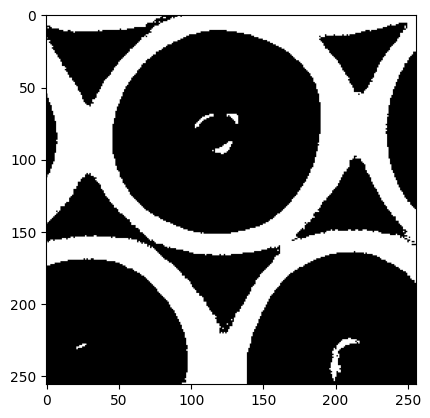

In [122]:
plt.imshow(th2,cmap='gray')

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False])

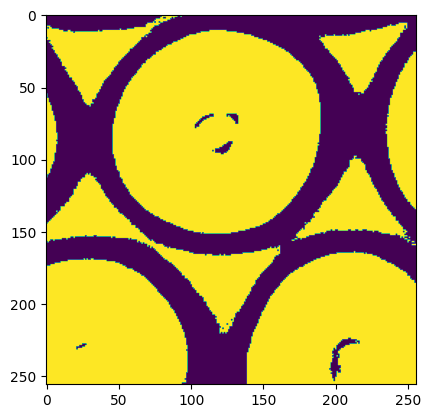

In [58]:
plt.imshow(np.logical_and(img_uint8, th2))

In [65]:
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage as ndi

In [123]:
img_max = ndi.maximum_filter(img_uint8, size=20, mode='constant')
filters = np.ones((3, 3))
filters[1][1] = 4
coords = peak_local_max(img_uint8, footprint=filters, labels=th2)
coords.shape

(956, 2)

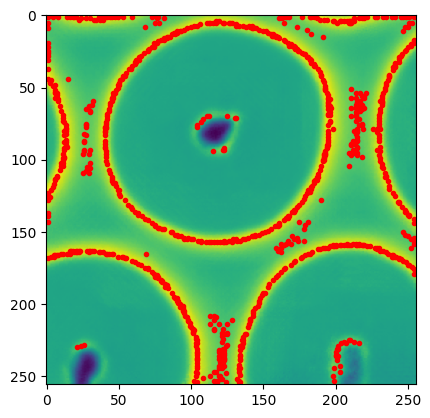

In [124]:
plt.imshow(img_uint8)
plt.plot(coords[:,1], coords[:,0], 'r.')

array([  0,   0,   0,   0,   0,   0, 255, 255, 255, 255], dtype=uint8)

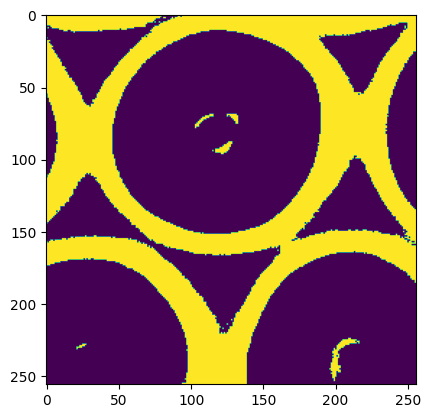

In [125]:
plt.imshow(th2)
th2[100][180:190]

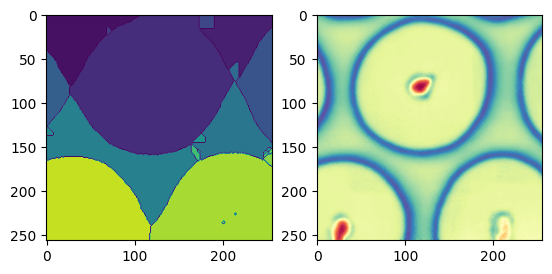

In [141]:
r = watershed(th2,watershed_line=True)
plt.subplot(1,2,1)
plt.imshow(r)
plt.subplot(1,2,2)
plt.imshow(img_uint8,cmap='Spectral')

In [78]:
dist = ndi.distance_transform_edt(img_uint8)
print(dist.min(), dist.max(), dist.shape)
coords = peak_local_max(dist, footprint=np.ones((3, 3)), labels=img_uint8)
mask = np.zeros(dist.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(th2, markers, mask=img_uint8)


1.0 361.33225707096784 (256, 256)


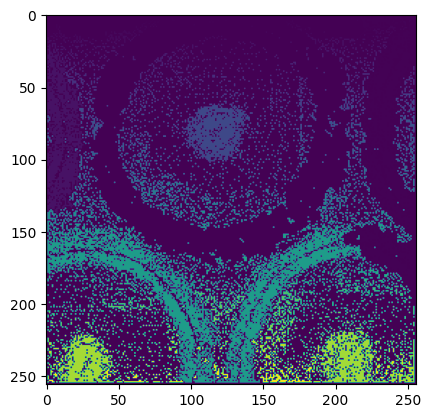

In [79]:
plt.imshow(markers)

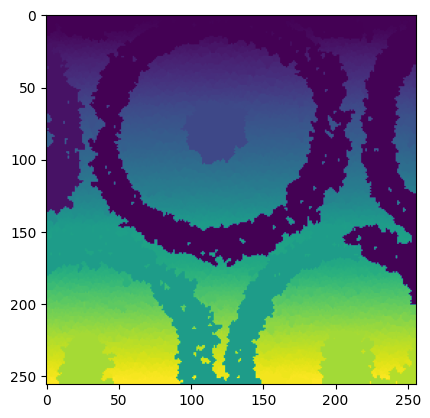

In [71]:
plt.imshow(labels)

In [164]:
from skimage.color import label2rgb
from skimage import data
thresholds = filters.threshold_multiotsu(img_uint8,classes=3)
regions = np.digitize(img_uint8, bins=thresholds)

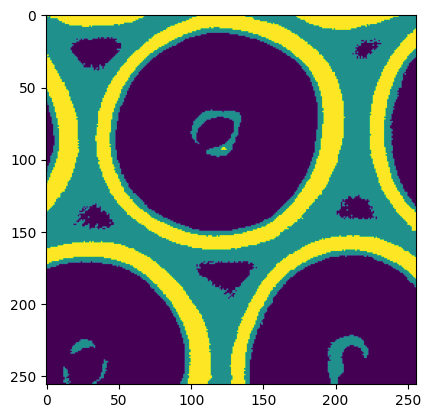

In [165]:
plt.imshow(regions)

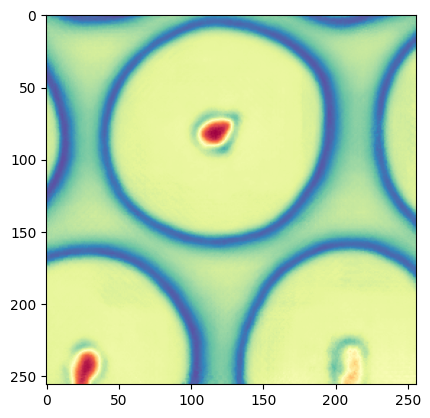

In [159]:
plt.imshow(img_uint8,cmap='Spectral')

In [166]:
markers, _ = ndi.label(th2)
markers 

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

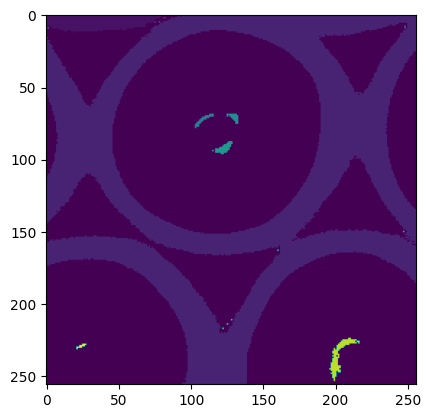

In [167]:
plt.imshow(markers)

In [168]:
markers[100][180:190]

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2], dtype=int32)